# Project 2: Linear Regression – Predicting Sales from Advertising Spend

This project uses a fictional advertising dataset to build a linear regression model that predicts **Sales** based on advertising spend in **TV**, **Radio**, and **Newspaper**.

Libraries used: `Pandas`, `Matplotlib`, `Seaborn`, `Scikit-learn`.

In [5]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("advertising_dataset.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,164.90,28.58,12.03,16.41
1,145.85,30.61,17.00,13.42
2,169.43,35.83,20.03,18.15
3,195.69,35.54,20.23,20.01
4,142.98,11.22,17.75,11.67


In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         50 non-null     float64
 1   Radio      50 non-null     float64
 2   Newspaper  50 non-null     float64
 3   Sales      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 2.663197534190237
Coefficients: [0.04818462 0.17307575 0.00083429]


In [13]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.6141003546742514
Mean Squared Error: 2.0801800752394426


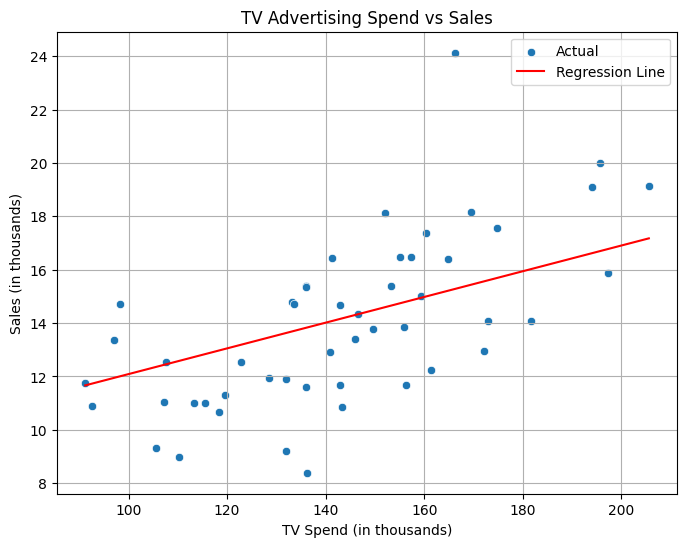

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df, label='Actual')

tv_line = np.linspace(df['TV'].min(), df['TV'].max(), 100)
sales_line = model.intercept_ + model.coef_[0]*tv_line + \
             model.coef_[1]*df['Radio'].mean() + model.coef_[2]*df['Newspaper'].mean()

plt.plot(tv_line, sales_line, color='red', label='Regression Line')
plt.title('TV Advertising Spend vs Sales')
plt.xlabel('TV Spend (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.legend()
plt.grid(True)
plt.savefig("tv_vs_sales_plot.png")
plt.show()
